In [1]:
import tensorflow as tf
from tensorflow.python.platform import gfile
import numpy as np
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 224
IMAGE_CHANNEL_NUM = 3

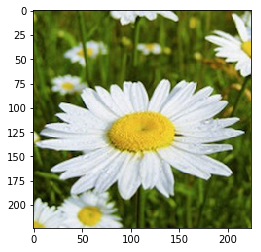

In [3]:
img = plt.imread("daisies.jpg")
plt.imshow(img)

[[[ 75 103 101]
  [146 134 132]
  [122 115 114]
  ...
  [216 200 203]
  [173 156 158]
  [ 99  78  96]]

 [[146 154 147]
  [233 208 203]
  [191 173 167]
  ...
  [103  86  72]
  [ 42  20  14]
  [172 151 172]]

 [[170 184 178]
  [ 13 238 237]
  [210 187 182]
  ...
  [168 159 129]
  [112  99  80]
  [221 202 229]]

 ...

 [[  5  16 240]
  [174 136 134]
  [175 138 136]
  ...
  [209 200 182]
  [241 227 212]
  [165 150 174]]

 [[  3  15 238]
  [171 133 131]
  [171 132 131]
  ...
  [204 198 178]
  [247 233 218]
  [170 154 180]]

 [[169 193 147]
  [ 18  13 248]
  [ 17  11 247]
  ...
  [128 132 110]
  [159 160 141]
  [107 108 127]]]


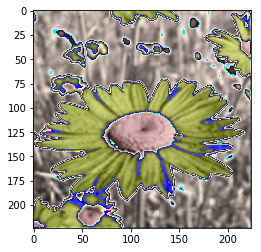

In [4]:
img_reshaped = img.reshape((1, IMAGE_SIZE, IMAGE_SIZE, IMAGE_CHANNEL_NUM))
with tf.Session() as sess:
    with gfile.FastGFile("./random_conv.pb", "rb") as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())
    x, output = tf.import_graph_def(graph_def, return_elements=["x:0", "output:0"])
    out_value = sess.run(output, feed_dict={x: img_reshaped})
    out_image = out_value.reshape((IMAGE_SIZE, IMAGE_SIZE, IMAGE_CHANNEL_NUM)).astype(np.uint8)
    plt.imshow(out_image)
    print(out_image)